In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

In [3]:
#loading mnist dataset
mnist = tf.keras.datasets.mnist


In [4]:
#we usually split the data as training and testing data. however in this case, it is already split
(x_train, y_train), (x_test, y_test) = mnist.load_data()          #returns two tuples

11490434/11490434 [==============================] - 8s 1us/step


In [5]:
#normalizing data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [6]:
#generating neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape =(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)
model.save("handRec")

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9828
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0375 - accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0305 - accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9931
INFO:tensorflow:Assets written to: handRec\assets


In [10]:
model = tf.keras.models.load_model('handRec')

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9727
0.09033948928117752
0.9726999998092651


In [19]:
image_number = 1

1/1 [==============================] - 0s 38ms/step
The digit is 1


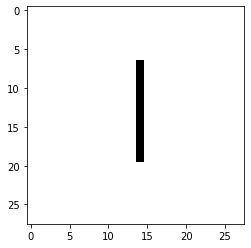

1/1 [==============================] - 0s 36ms/step
The digit is 2


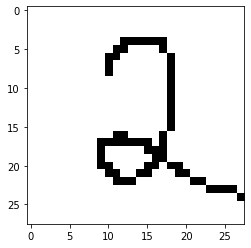

1/1 [==============================] - 0s 31ms/step
The digit is 6


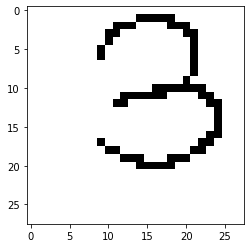

In [20]:
while os.path.isfile(f"Dig images/dig{image_number}.png"):
    try:
        img = cv2.imread(f"Dig images/dig{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The digit is {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1
        